In this project we will be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement on a company website. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user. <br/>
'Clicked on Ad' is the categorical target feature, which has two possible values: 0 (user didn't click) and 1(user clicked). <br/>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('dataset/advertising.csv')
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [3]:
data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


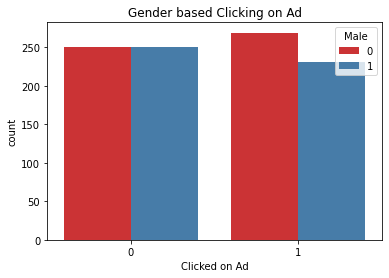

In [4]:
sns.countplot(hue='Male', x='Clicked on Ad', data=data, palette="Set1").set(title="Gender based Clicking on Ad");

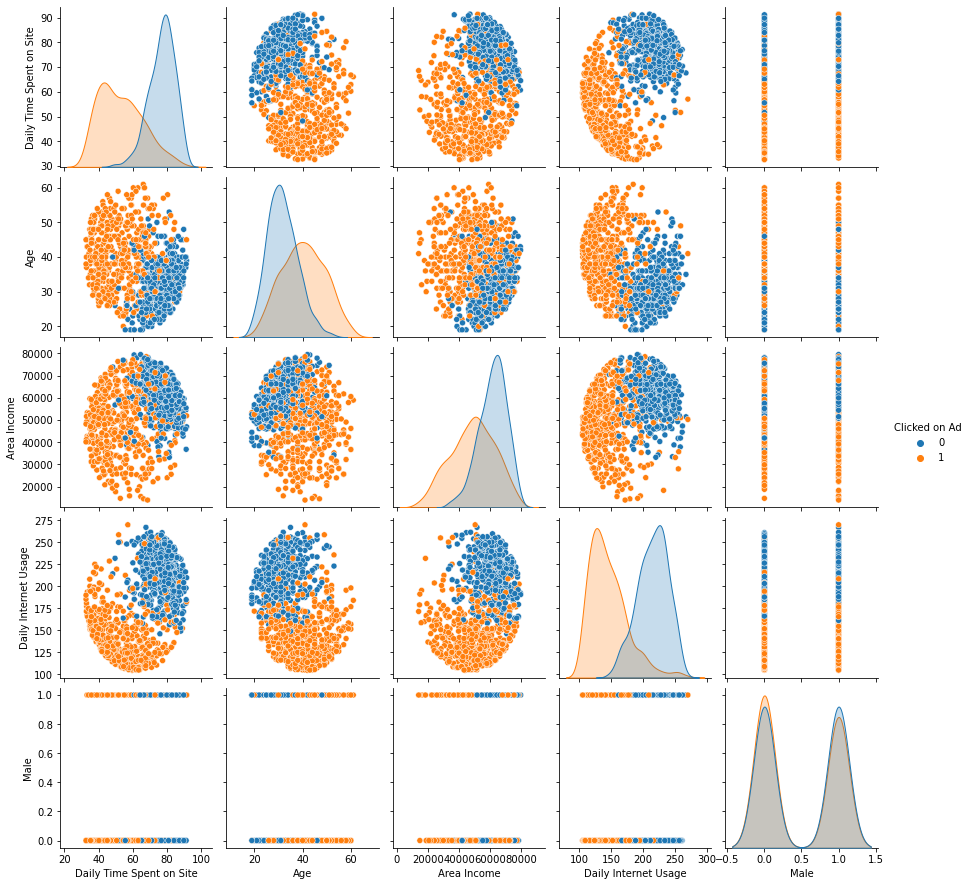

In [5]:
sns.pairplot(data, hue='Clicked on Ad')

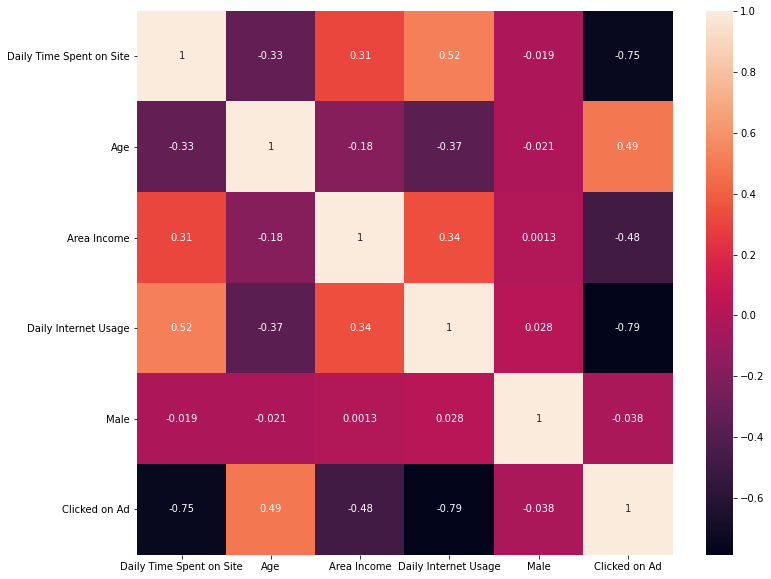

In [6]:
fig = plt.figure(figsize=(12,10))
sns.heatmap(data.corr(), annot=True);

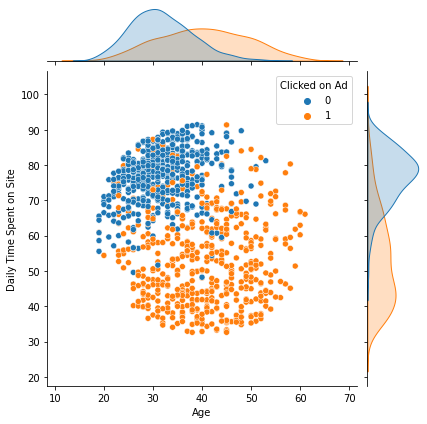

In [7]:
sns.jointplot(x='Age',y='Daily Time Spent on Site',data=data, hue="Clicked on Ad");

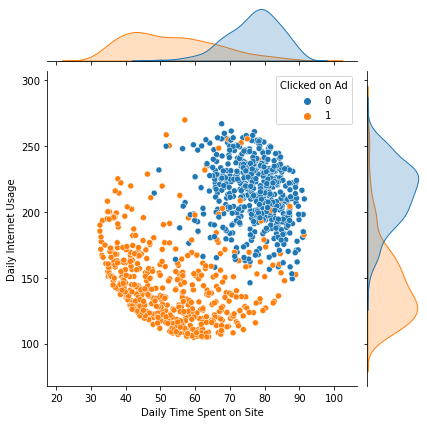

In [8]:
sns.jointplot(x='Daily Time Spent on Site',y='Daily Internet Usage',data=data,hue="Clicked on Ad");

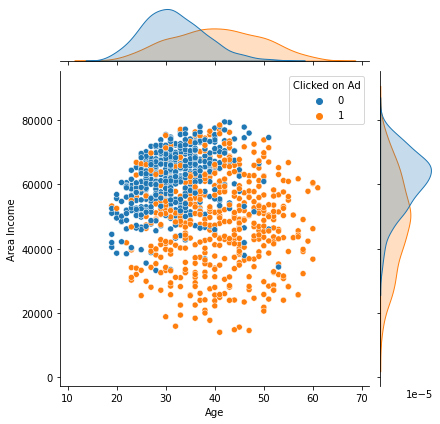

In [9]:
sns.jointplot(x='Age', y='Area Income', data=data, hue="Clicked on Ad");

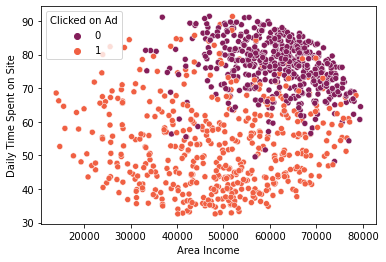

In [10]:
sns.scatterplot(x='Area Income',y='Daily Time Spent on Site', hue='Clicked on Ad', data=data, palette='rocket');

In [11]:
data = data.drop(['Ad Topic Line', 'City', 'Country', 'Timestamp'], axis=1)  
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
0,68.95,35,61833.90,256.09,0,0
1,80.23,31,68441.85,193.77,1,0
2,69.47,26,59785.94,236.50,0,0
3,74.15,29,54806.18,245.89,1,0
4,68.37,35,73889.99,225.58,0,0


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numeric_features = ['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage']
data[numeric_features] = scaler.fit_transform(data[numeric_features])

X = data.drop(['Clicked on Ad'], axis=1)
y = data['Clicked on Ad']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [13]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [14]:
predictions = logmodel.predict(X_test)

In [15]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       162
           1       0.99      0.96      0.97       168

    accuracy                           0.97       330
   macro avg       0.97      0.97      0.97       330
weighted avg       0.97      0.97      0.97       330



In [16]:
print(confusion_matrix(predictions, y_test))

[[160   7]
 [  2 161]]


In [17]:
print(accuracy_score(predictions, y_test))

0.9727272727272728


### <div style="text-align: right"> Developed by Mr. Ronik Dedhia</div>